# WELCOME TO CUSTOMER ANALYSIS FOR RETAIL CASE STUDY :--

###

## BUSINESS PROBLEM:
  ### A Retail store is required to analyze the day-to-day transactions and keep a track of its customersspread across various locations along with their purchases/returns across various categories.


######

### Creating a report and displaying the below calculated metrics, reports and inferences

#### Q1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure tokeep all customers who have done transactions with us and select the join type accordingly.

In [1]:
import numpy as np
import pandas as pd
customer=pd.read_csv('Customer.csv')
product=pd.read_csv('prod_cat_info.csv')
transaction=pd.read_csv('Transactions.csv')

In [2]:
tran_cust_df=pd.merge(left=transaction,right=product,left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code'], how ='left')
Customer_Final=pd.merge(left=tran_cust_df,right=customer,left_on='cust_id',right_on='customer_Id',how='left')
Customer_Final.drop(['customer_Id','prod_subcat_code'],axis=1,inplace=True)
Customer_Final.rename(columns={'cust_id':'Customer_Id'},inplace=True)
Customer_Final

,transaction_id,Customer_Id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,22-05-1970,M,2.0


In [5]:
Customer_Final.isna().sum()

transaction_id       0
Customer_Id          0
tran_date            0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
DOB                  0
Gender               9
city_code            8
dtype: int64

In [6]:
total=Customer_Final.shape[0]
missed1=Customer_Final.isna().sum()
nas=(total/missed1)*100
nas

transaction_id                inf
Customer_Id                   inf
tran_date                     inf
prod_cat_code                 inf
Qty                           inf
Rate                          inf
Tax                           inf
total_amt                     inf
Store_type                    inf
prod_cat                      inf
prod_sub_cat_code             inf
prod_subcat                   inf
DOB                           inf
Gender               2.561444e+05
city_code            2.881625e+05
dtype: float64

In [7]:
Customer_Final.dtypes

transaction_id         int64
Customer_Id            int64
tran_date             object
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
DOB                   object
Gender                object
city_code            float64
dtype: object

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
Customer_Final['DOB']=pd.to_datetime(Customer_Final['DOB'],errors='coerce')

In [5]:
Customer_Final['tran_date']=pd.to_datetime(Customer_Final['tran_date'],errors='coerce')

In [11]:
Customer_Final.dtypes

transaction_id                int64
Customer_Id                   int64
tran_date            datetime64[ns]
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
dtype: object

### 2 Prepare a summary report for the merged data set.

#### a. Get the column names and their corresponding data types

In [12]:

print(f"Corresponding data types are:\n{Customer_Final.dtypes}")

Corresponding data types are:
transaction_id                int64
Customer_Id                   int64
tran_date            datetime64[ns]
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
dtype: object


### b. Top/Bottom 10 observations

In [13]:
print(f"Top 10 Observations:\n{Customer_Final.head(10)}\n")
print(f"Bottom 10 observations:\n{Customer_Final.tail(10)}")

Top 10 Observations:
   transaction_id  Customer_Id  tran_date  prod_cat_code  Qty  Rate      Tax  \
0     80712190438       270351 2014-02-28              1   -5  -772  405.300   
1     29258453508       270384 2014-02-27              3   -5 -1497  785.925   
2     51750724947       273420 2014-02-24              5   -2  -791  166.110   
3     93274880719       271509 2014-02-24              6   -3 -1363  429.345   
4     51750724947       273420 2014-02-23              5   -2  -791  166.110   
5     97439039119       272357 2014-02-23              3   -2  -824  173.040   
6     45649838090       273667 2014-02-22              6   -1 -1450  152.250   
7     22643667930       271489 2014-02-22              6   -1 -1225  128.625   
8     79792372943       275108 2014-02-22              1   -3  -908  286.020   
9     50076728598       269014 2014-02-21              3   -4  -581  244.020   

   total_amt Store_type          prod_cat  prod_sub_cat_code  \
0  -4265.300     e-Shop          C

### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [6]:
Five_number_summary=Customer_Final.describe()
continuous_variables=Five_number_summary.loc[['min','25%','50%','75%','max']]
continuous_variables.index=('min', 'Q1', 'median', 'Q3','max')
continuous_variables

,transaction_id,Customer_Id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code,DOB,city_code
min,3.268991e+06,266783.0,2011-01-25 00:00:00,1.0,-5.0,-1499.0,7.350,-8270.925,1.0,1970-01-02 00:00:00,1.0
Q1,2.493864e+10,268935.0,2011-10-29 00:00:00,2.0,1.0,312.0,98.280,762.450,3.0,1975-09-26 00:00:00,3.0
median,5.009313e+10,270980.0,2012-08-14 00:00:00,4.0,3.0,710.0,199.080,1754.740,5.0,1981-06-16 00:00:00,5.0
Q3,7.533000e+10,273114.0,2013-05-19 00:00:00,5.0,4.0,1109.0,365.715,3569.150,10.0,1987-06-05 00:00:00,8.0
max,9.998755e+10,275265.0,2014-02-28 00:00:00,6.0,5.0,1500.0,787.500,8287.500,12.0,1992-12-29 00:00:00,10.0


### d. Frequency tables for all the categorical variables

In [7]:
frequency_table={column: Customer_Final[column].value_counts()
                 for column in Customer_Final.columns 
                 if Customer_Final[column].dtype == 'object'}
for column, freq_table in frequency_table.items():
    print(f"Frequency table for {column}:")
    print(freq_table)
    print("\n") 

Frequency table for Store_type:
Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64


Frequency table for prod_cat:
prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64


Frequency table for prod_subcat:
prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: count, dtype: int64


Frequency table for Gender:
Gender
M    118

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


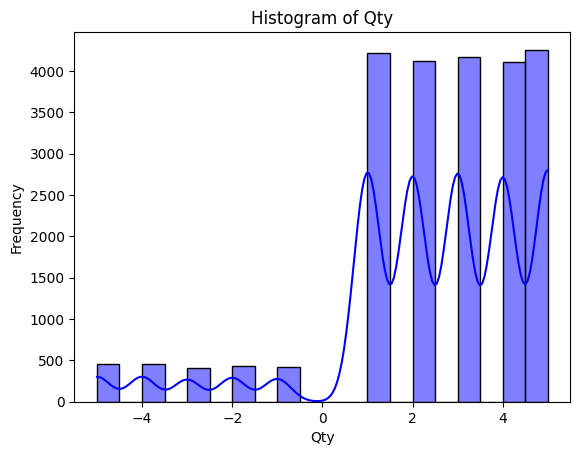

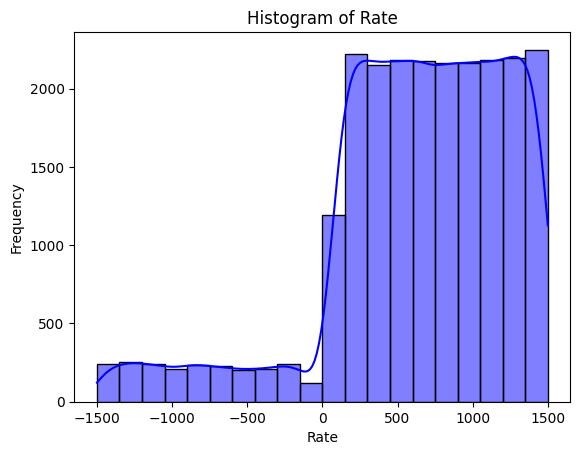

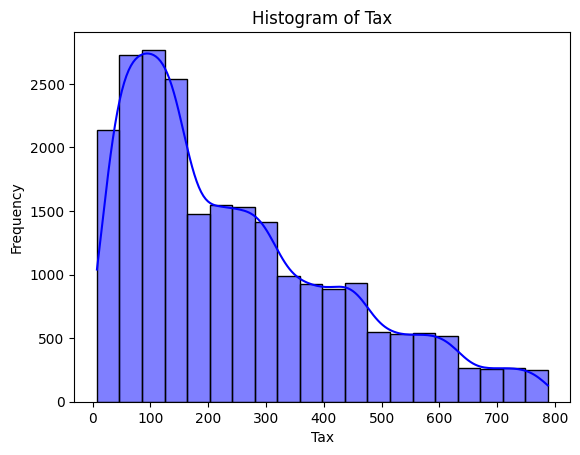

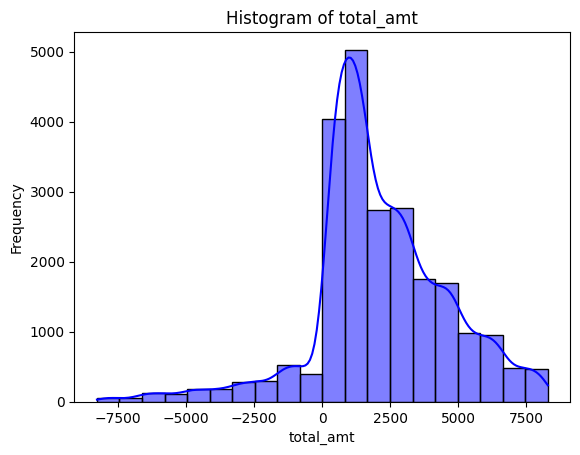

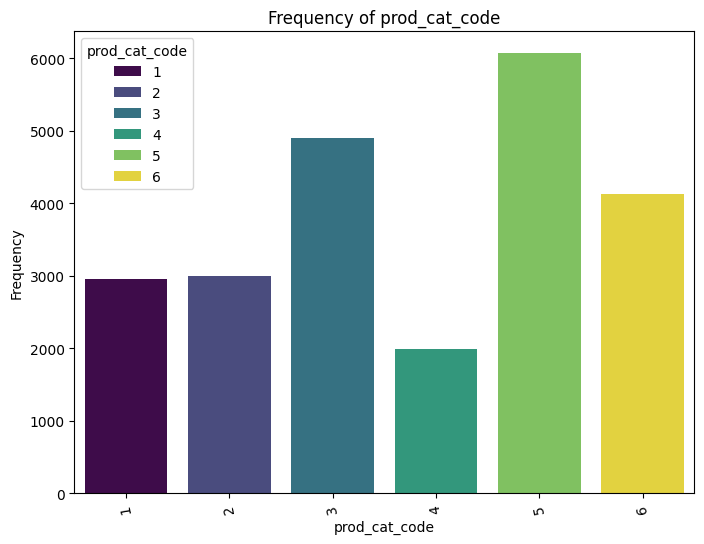

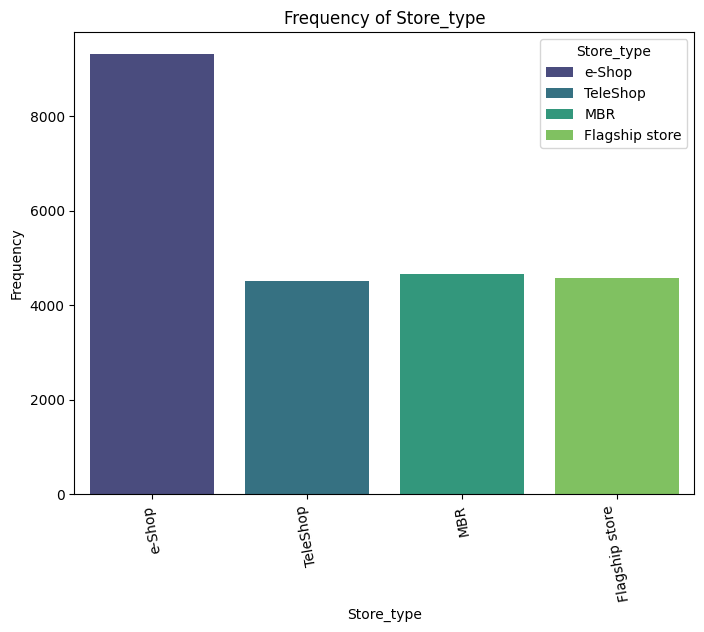

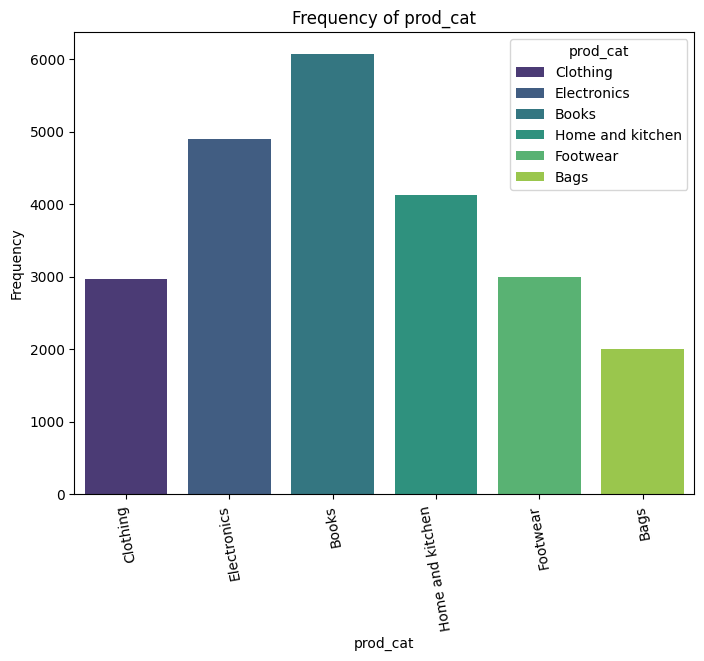

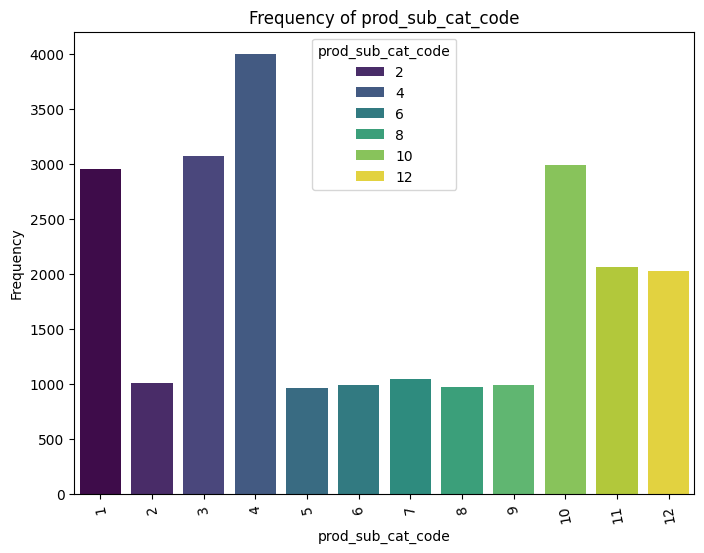

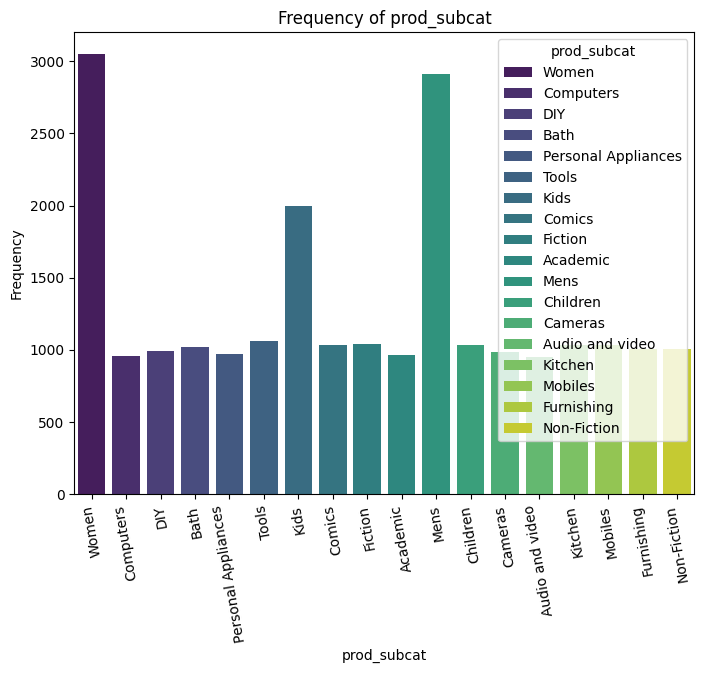

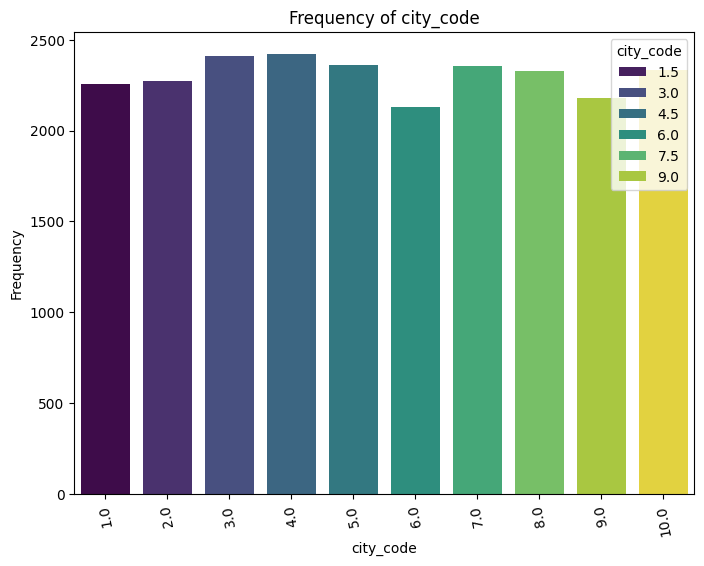

In [13]:
continuous_variables=['Qty','Rate','Tax','total_amt']
categorical_variables=['prod_cat_code','Store_type','prod_cat','prod_sub_cat_code','prod_subcat','city_code']
for var in continuous_variables:
    sns.histplot(Customer_Final[var],bins=20,kde=True,color='blue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

for var in categorical_variables:
     plt.figure(figsize=(8, 6))
     sns.countplot(data=Customer_Final, x=var, hue=var, palette='viridis', legend=True)
     plt.title(f'Frequency of {var}')
     plt.xlabel(var)
     plt.ylabel('Frequency')
     plt.xticks(rotation=100)
     plt.show()

### 4. Calculate the following information using the merged dataset :

#### a. Time period of the available transaction data

In [14]:
date_min = Customer_Final['tran_date'].min()
date_max = Customer_Final['tran_date'].max()
period=(date_max-date_min).days
print('Time period of transaction data is :',period)

Time period of transaction data is : 1130


#### b. Count of transactions where the total amount of transaction was negative

In [15]:
transaction_was_negative=Customer_Final['total_amt']<0
print('Count of transactions where the total amount of transaction was negative:\n',transaction_was_negative.sum())

Count of transactions where the total amount of transaction was negative:
 2177


### 5. Analyze which product categories are more popular among females vs male customers

In [16]:
category_counts = Customer_Final.groupby(['Gender', 'prod_cat']).size().unstack()
category_counts

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,994,2949,1439,2328,1529,1994
M,1004,3116,1518,2570,1469,2134


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?   

In [17]:
maximum_customers=Customer_Final['city_code'].value_counts().idxmax()
percentage_of_customers=Customer_Final['city_code'].value_counts(normalize=True).max()*100
print('maximum customers city code is:',maximum_customers)
print('percentage of customers :',percentage_of_customers)

maximum customers city code is: 4.0
percentage of customers : 10.509871989585594


### 7. Which store type sells the maximum products by value and by quantity?

In [18]:
maximum_products=Customer_Final.groupby('Store_type')[['total_amt','Qty']].max()
maximum_products.reset_index()
print('The store type which sells the maximum products by value and by quantity is :\n',maximum_products)

The store type which sells the maximum products by value and by quantity is :
                 total_amt  Qty
Store_type                    
Flagship store    8254.35    5
MBR               8287.50    5
TeleShop          8287.50    5
e-Shop            8287.50    5


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?        ?

In [19]:
total_amount_earned=Customer_Final[(Customer_Final['Store_type']=='Flagship stores') | (Customer_Final['prod_cat'].isin(['Electronics','Clothing']))]
total_amount_earned1=total_amount_earned['total_amt'].sum()
print('total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is:',total_amount_earned1)

total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is: 16973601.125


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [20]:
total_amount_earned2=Customer_Final[(Customer_Final['Gender']=='M') | (Customer_Final['prod_cat'].isin(['Electronics']))]
total_amount_earned3=total_amount_earned2['total_amt'].sum()
total_amount_earned3

29954986.424999997

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [21]:
positive_trans = Customer_Final[Customer_Final['total_amt'] > 0]
customer_unique_trans = positive_trans.groupby('Customer_Id')['transaction_id'].nunique()
customers_more_than_10_trans = customer_unique_trans[customer_unique_trans > 10]
num_customers_more_than_10_trans = len(customers_more_than_10_trans)
print("Number of customers with more than 10 unique transactions:", num_customers_more_than_10_trans)


Number of customers with more than 10 unique transactions: 6


### 11. For all customers aged between 25 - 35, find out:
#### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [22]:
Customer_Final['Age'] = pd.Timestamp.now().year - Customer_Final['DOB'].dt.year
filtered_transactions = Customer_Final[(Customer_Final['Age'] >= 25) & (Customer_Final['Age'] <= 35) &
                                        (Customer_Final['prod_cat'].isin(['Electronics', 'Books']))]
total_amount_spent = filtered_transactions['total_amt'].sum()
print("Total amount spent for Electronics and Books by customers aged between 25 and 35:", total_amount_spent)

Total amount spent for Electronics and Books by customers aged between 25 and 35: 3928470.585


### 11. For all customers aged between 25 - 35, find out:
#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [23]:
filtered_transactions = Customer_Final[(Customer_Final['tran_date'] >= '2014-01-01') & 
                                       (Customer_Final['tran_date'] <= '2014-03-01') &
                                       (Customer_Final['Age'] >= 25) &
                                       (Customer_Final['Age'] <= 35)]
total_amount_spent = filtered_transactions['total_amt'].sum()
total_amount_spent = round(total_amount_spent, 2)
print("Total amount spent by customers aged between 25 and 35 between 1st Jan, 2014 to 1st Mar, 2014:", total_amount_spent)

Total amount spent by customers aged between 25 and 35 between 1st Jan, 2014 to 1st Mar, 2014: 236155.08
